<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import seaborn as sb
import matplotlib.pyplot as plt


Загрузим все библиотеки и функции, необходимые для работы.

In [2]:
import warnings 
warnings.filterwarnings('ignore')

Отключим предупреждения

In [3]:
data=pd.read_csv('/datasets/Churn.csv')

Загрузим датасет.

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Видим пропуски в столбце "Tenure". Это менее 10% от общего количества, поэтому их можно удалить.

In [6]:
data['Tenure'] = data['Tenure'].fillna(-1)
data['Tenure'] = data['Tenure'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  object 
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.1+ MB


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  object 
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.1+ MB


In [8]:
data.duplicated().sum()

0

Дубликатов нет

In [9]:
data = data.drop(['RowNumber', 'CustomerId', "Surname"], axis=1)

Столбцы "индекс строки", "уникальный идентификатор клиента" и "Фамилия" никак не влияют на уход клиента, поэтому их можно удалить.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  object 
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [11]:
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,...,Tenure_1.0,Tenure_2.0,Tenure_3.0,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0
0,619,42,0.00,1,1,1,101348.88,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,502,42,159660.80,3,1,0,113931.57,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,699,39,0.00,2,0,0,93826.63,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,...,0,1,0,0,0,0,0,0,0,0


Преобразоваваем категориальные признаки в численные прямым кодированием (OHE), так как OHE работает со всеми моделями.. 

In [12]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

features_train, features_other, target_train, target_other = train_test_split(features, target, test_size=0.4)
features_valid, features_test, target_valid, target_test = train_test_split(features_other, target_other, test_size=0.5) 
                                                                              
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(6000, 21) (2000, 21) (2000, 21)
(6000,) (2000,) (2000,)


Разделим выборку на обучающую, валидационную и тестовую.

In [13]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


Стандартизировали численные признаки.

## Исследование задачи

In [14]:
bal_0_1 = data['Exited'].value_counts(normalize=True)
bal_0_1

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Соотношение классов 1 к 4.

In [15]:
%%time

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predicted_valid))

F1 0.3460207612456747
CPU times: user 37.8 ms, sys: 49 ms, total: 86.8 ms
Wall time: 64.7 ms


In [16]:
%%time

best_model_tree = None
best_result = 0
accuracy_arr_tree = []

for depth in range(2, 30):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train, target_train)
    predicted_valid = model_tree.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    
    if best_result < result:
        best_result = result
        max_depth = depth
        best_model_tree = model_tree

print("Лучшая F-мера", best_result, 'cо значением глубины =', depth)

Лучшая F-мера 0.6085714285714287 cо значением глубины = 29
CPU times: user 780 ms, sys: 33.2 ms, total: 813 ms
Wall time: 826 ms


In [17]:
%%time

best_model_rf = None
best_result = 0
best_depth = 0
best_est = 0

for estimator in range(10, 50, 2):
    for depth in range(10, 20):
        model_rf =  RandomForestClassifier(random_state=12345, n_estimators=estimator, max_depth = depth)
        model_rf.fit(features_train, target_train)
        predicted_valid = model_rf.predict(features_valid)
        result = f1_score(target_valid, predicted_valid) 
        
        if result > best_result:
            best_model_rf = model_rf
            best_result = result
            best_depth = depth
            best_est = estimator

print("Лучшая F-мера", best_result, 'при глубине = {0} и количестве деревьев = {1}'.format(best_depth, best_est))

Лучшая F-мера 0.6035502958579883 при глубине = 19 и количестве деревьев = 20
CPU times: user 35.3 s, sys: 232 ms, total: 35.5 s
Wall time: 1min 2s


Лучший показатель F1 без учета дисбаланса колассов оказался у модели случайного лееса: 0.6024464831804281 при глубине = 16 и количестве деревьев = 30.

## Борьба с дисбалансом

Придадим объектам редкого класса 1 больший вес используя гиперпараметр class_weight='balanced'

In [18]:
%%time

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predicted_valid))
print()

F1 0.49705139005897225

CPU times: user 34.5 ms, sys: 301 µs, total: 34.8 ms
Wall time: 19.3 ms


In [19]:
%%time

best_model_tree_balance = None
best_result_balance = 0

for depth in range(2, 20):
    model_tree_balance = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model_tree_balance.fit(features_train, target_train)
    predicted_valid = model_tree_balance.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    
    if best_result_balance < result:
        best_result_balance = result
        max_depth = depth
        best_model_tree_balance = model_tree_balance

print("Лучшая F-мера", best_result_balance, 'cо значением глубины =', max_depth)

Лучшая F-мера 0.5821782178217823 cо значением глубины = 8
CPU times: user 487 ms, sys: 65 ms, total: 552 ms
Wall time: 1.09 s


In [20]:
%%time

best_model_rf_balance = None
best_result_balance = 0
best_depth_balance = 0
best_est_balance = 0

for estimator in range(10, 100, 20):
    for depth in range(10, 20):
        model_rf_balance =  RandomForestClassifier(random_state=12345, n_estimators=estimator, 
                                                   max_depth = depth, class_weight='balanced')
        model_rf_balance.fit(features_train, target_train)
        predicted_valid = model_rf_balance.predict(features_valid)
        result = f1_score(target_valid, predicted_valid) 
        
        if result > best_result_balance:
            best_model_rf_balance = model_rf_balance
            best_result_balance = result
            best_depth_balance = depth
            best_est_balance = estimator

print("Лучшая F-мера", best_result_balance, 'при глубине = {0} и количестве деревьев = {1}'.format(best_depth_balance,
                                                                                           best_est_balance))

Лучшая F-мера 0.6444708680142687 при глубине = 11 и количестве деревьев = 70
CPU times: user 15.9 s, sys: 136 ms, total: 16 s
Wall time: 34.5 s


Случайный лес и тут впереди.

Увеличим объекты редкого класса методом upsampling и заново обучим модели.

In [21]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts())

1    4904
0    4774
Name: Exited, dtype: int64


In [22]:
%%time

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predicted_valid))
print()

F1 0.4958540630182422

CPU times: user 41 ms, sys: 22.5 ms, total: 63.5 ms
Wall time: 111 ms


In [23]:
%%time


best_model_tree_upsmple = None
best_result_upsmple = 0

for depth in range(2, 20):
    model_tree_upsmple = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree_upsmple.fit(features_upsampled, target_upsampled)
    predicted_valid = model_tree_upsmple.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    
    if best_result_upsmple < result:
        best_result_upsmple = result
        max_depth_upsmple = depth
        best_model_tree_upsmple = model_tree_upsmple

print("Лучшая F-мера", best_result_upsmple, 'cо значением глубины =', max_depth_upsmple)

Лучшая F-мера 0.5734126984126984 cо значением глубины = 8
CPU times: user 607 ms, sys: 11.5 ms, total: 618 ms
Wall time: 1.23 s


In [24]:
%%time

best_model_rf_upsample = None
best_result_upsample = 0
best_depth_upsample = 0
best_est_upsample = 0


for estimator in range(10, 200, 20):
    for depth in range(10, 20):
        model_rf_upsample =  RandomForestClassifier(random_state=12345, n_estimators=estimator, 
                                                   max_depth = depth)
        model_rf_upsample.fit(features_upsampled, target_upsampled)
        predicted_valid = model_rf_upsample.predict(features_valid)
        result = f1_score(target_valid, predicted_valid) 
        
        if result > best_result_upsample:
            best_model_rf_upsample = model_rf_upsample
            best_result_upsample = result
            best_depth_upsample = depth
            best_est_upsample = estimator
            
           

print("Лучшая F-мера", best_result_upsample, 'при глубине = {0} и количестве деревьев = {1}'.format(best_depth_upsample,
                                                                                           best_est_upsample))

Лучшая F-мера 0.6494724501758499 при глубине = 14 и количестве деревьев = 110
CPU times: user 1min 24s, sys: 593 ms, total: 1min 24s
Wall time: 2min 51s


Уменьшим выборку методом downsampling.

In [25]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(target_downsampled.value_counts())

1    1226
0    1194
Name: Exited, dtype: int64


In [26]:
%%time

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predicted_valid))
print()

F1 0.49489795918367346

CPU times: user 24.5 ms, sys: 11.5 ms, total: 36 ms
Wall time: 15 ms


In [27]:
best_model_tree_downsample = None
best_result_downsample = 0

for depth in range(2, 20):
    model_tree_downsample = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree_downsample.fit(features_downsampled, target_downsampled)
    predicted_valid = model_tree_downsample.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    
    if best_result_downsample < result:
        best_result_downsample = result
        max_depth_downsample = depth
        best_model_tree_downsample = model_tree_downsample

print("Лучшая F-мера", best_result_downsample, 'cо значением глубины =', max_depth_downsample)

Лучшая F-мера 0.569215876089061 cо значением глубины = 5


In [28]:
%%time

best_model_rf_downsample = None
best_result_downsample = 0
best_depth_downsample = 0
best_est_downsample = 0

for estimator in range(10, 100, 20):
    for depth in range(10, 20):
        model_rf_downsample =  RandomForestClassifier(random_state=12345, n_estimators=estimator, 
                                                   max_depth = depth)
        model_rf_downsample.fit(features_downsampled, target_downsampled)
        predicted_valid = model_rf_downsample.predict(features_valid)
        result = f1_score(target_valid, predicted_valid) 
        
        if result > best_result_downsample:
            best_model_rf_downsample = model_rf_downsample
            best_result_downsample = result
            best_depth_downsample = depth
            best_est_downsample = estimator

print("Лучшая F-мера", best_result_downsample, 'при глубине = {0} и количестве деревьев = {1}'.format(best_depth_downsample,
                                                                                           best_est_downsample))

Лучшая F-мера 0.6146435452793834 при глубине = 10 и количестве деревьев = 50
CPU times: user 9.06 s, sys: 75.2 ms, total: 9.13 s
Wall time: 18.5 s


Вывод: Лучше всего себя показала модель Случайный лес с F-мерой 0.6264150943396227 при глубине = 10 и количестве деревьев = 70

AUC-ROC RandomForestClassifier 0.7750089856290855


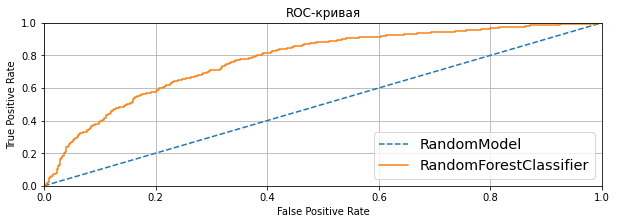

In [29]:
plt.figure(figsize=[10,3])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

model_rf_upsample =  RandomForestClassifier(random_state=12345, n_estimators=70, 
                                                   max_depth = 10)
model_rf_upsample.fit(features_upsampled, target_upsampled)
predicted_valid = model_rf_upsample.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.grid(True)

plt.title("ROC-кривая")
plt.show()

Вывели значение AUC-ROC и построили ROC кривую.

## Тестирование модели

In [30]:
model = RandomForestClassifier(random_state=12345, n_estimators=190, 
                                                   max_depth = 12)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
f1_score(target_test, predicted_test)

0.6153846153846154

###### Вывод

Изучил и подготовил данные. Классы оказались не сбалансированы. Тех кто остался в Бета-Банке 80%, тех, кто ушел, 20%.
Разбил данные на тренировочную, валидационную и тестовую выборки.
Проверил модели на данных без изменений.
Скоректировал балланс класса. Изменил вес класса.
Получил улучшенную модель. Провёл поиск гиперпараметров.
Провёл финальный тест.
Обученная модель случайного леса с увеличением выборки имеет достаточную адекватность, подтвержденная ее значением AUC-ROC = 0.7. Это лучше, чем случайная модель предсказывания (AUC-ROC = 0.5). На тестовой выборке показала значение F-меры - 0.6, что соответствует критерию задания/заказчика.